In [237]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
train_features = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_features = pd.read_csv("test_set_features.csv")
submission_format = pd.read_csv("submission_format.csv")

In [239]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<Axes: >

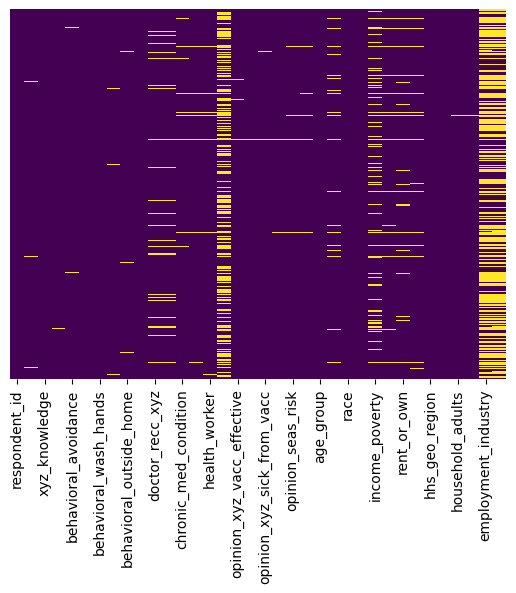

In [240]:
sns.heatmap(train_features.isnull(),yticklabels=False ,cbar= False,cmap= 'viridis')

In [241]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [242]:
#health_insurance, doctor_recc_xyz, doctor_recc_seasonal, rent_or_own,income_poverty, employment_industry, employment_occupation,education, marital_status

In [243]:
train_features['health_insurance']

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
26702    NaN
26703    1.0
26704    NaN
26705    0.0
26706    1.0
Name: health_insurance, Length: 26707, dtype: float64

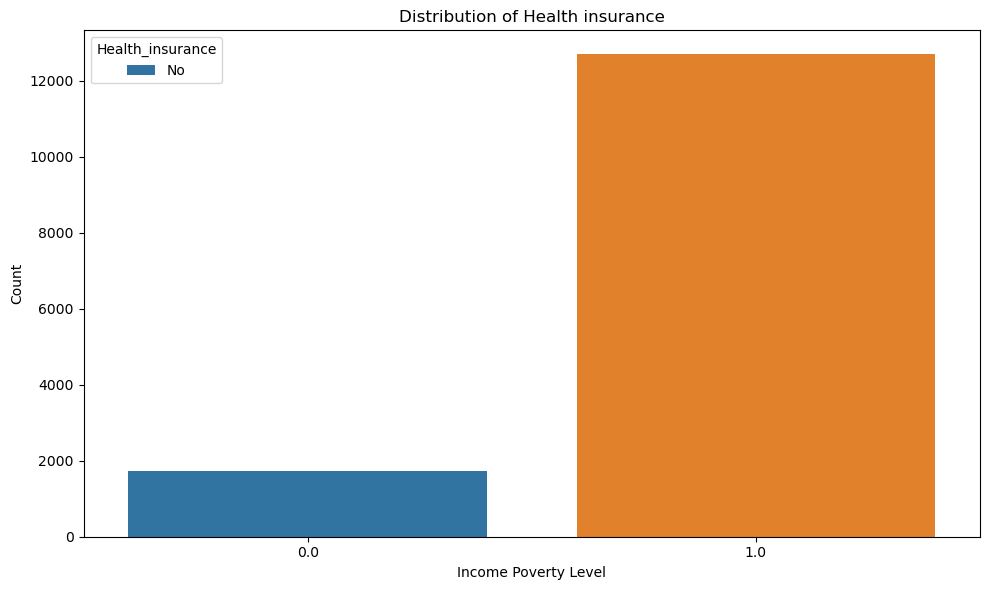

In [244]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_features, x='health_insurance')
plt.title('Distribution of Health insurance')
plt.xlabel('Income Poverty Level')
plt.ylabel('Count')
plt.legend(title='Health_insurance', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [245]:
train_features['health_insurance'] = train_features['health_insurance'].fillna(train_features['health_insurance'].mode()[0])

In [246]:
train_features['health_insurance'].count()

26707

In [247]:
train_features['doctor_recc_xyz'].isnull().sum()

2160

In [248]:
train_features['doctor_recc_seasonal'].isnull().sum()

2160

In [249]:
#in doctor_recc_xyz and doctor_recc_seasonal, missing value may represent no vaccine was recommended. so replace by 0.
train_features['doctor_recc_xyz'] = train_features['doctor_recc_xyz'].fillna(0.0)
train_features['doctor_recc_seasonal'] = train_features['doctor_recc_seasonal'].fillna(0.0)

In [250]:
train_features['employment_industry'].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [251]:
train_features['employment_industry'].fillna('Unknown', inplace=True)
train_features['employment_occupation'].fillna('Unknown', inplace=True)

In [252]:
train_features['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

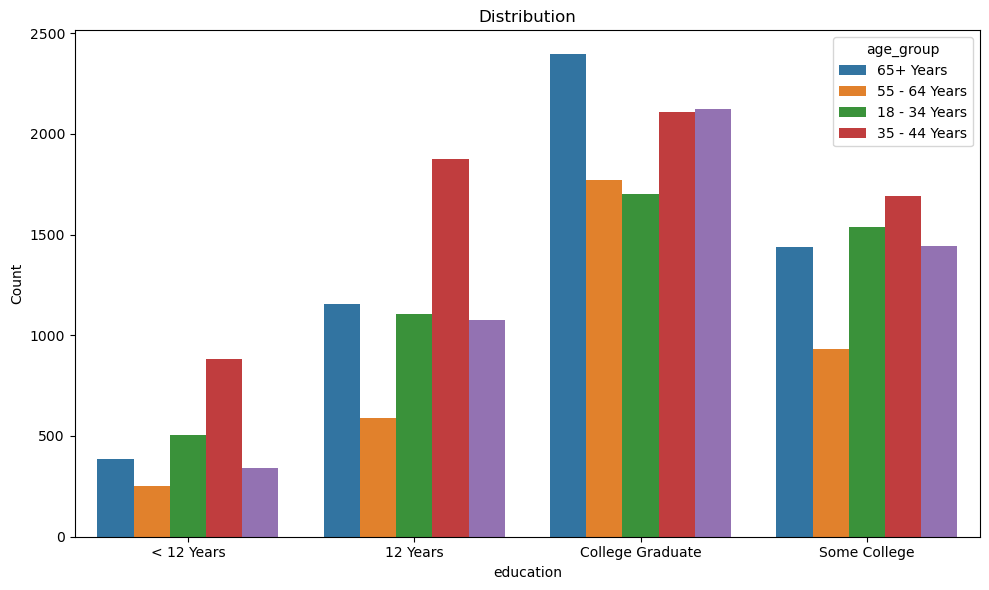

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_features, x='education',hue='age_group')
plt.title('Distribution')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='age_group', labels=['65+ Years', '55 - 64 Years','18 - 34 Years','35 - 44 Years'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [254]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [255]:
train_features['xyz_concern']

0        1.0
1        3.0
2        1.0
3        1.0
4        2.0
        ... 
26702    2.0
26703    1.0
26704    2.0
26705    1.0
26706    0.0
Name: xyz_concern, Length: 26707, dtype: float64

In [256]:
data = pd.concat([train_features, train_labels], axis=1)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [258]:
median_fill_columns = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home','chronic_med_condition', 'child_under_6_months','health_worker','behavioral_touch_face']
for col in median_fill_columns:
    data[col]= data[col].fillna(data[col].median())
    



In [259]:
median_fill_columns = ['xyz_concern', 'xyz_knowledge','household_adults','household_children']
for col in median_fill_columns:
     data[col] = data[col].fillna(data[col].median())
        
data['rent_or_own'] = data['rent_or_own'].fillna('Own')
data['income_poverty'] = data['income_poverty'].fillna('<= $75,000, Above Poverty')

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [261]:
data['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [262]:
data['rent_or_own'].value_counts()

rent_or_own
Own     20778
Rent     5929
Name: count, dtype: int64

In [263]:
data['marital_status'].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [264]:
data['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [265]:
data_new = data.dropna()

In [267]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24813 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                24813 non-null  int64  
 1   xyz_concern                  24813 non-null  float64
 2   xyz_knowledge                24813 non-null  float64
 3   behavioral_antiviral_meds    24813 non-null  float64
 4   behavioral_avoidance         24813 non-null  float64
 5   behavioral_face_mask         24813 non-null  float64
 6   behavioral_wash_hands        24813 non-null  float64
 7   behavioral_large_gatherings  24813 non-null  float64
 8   behavioral_outside_home      24813 non-null  float64
 9   behavioral_touch_face        24813 non-null  float64
 10  doctor_recc_xyz              24813 non-null  float64
 11  doctor_recc_seasonal         24813 non-null  float64
 12  chronic_med_condition        24813 non-null  float64
 13  child_under_6_months 

In [268]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [283]:


# Encode categorical columns
df_encoded = data_new.copy()  # Create a copy to preserve original DataFrame
df_encoded[data_new.select_dtypes(include=['object']).columns] = ord_enc.fit_transform(data_new[data_new.select_dtypes(include=['object']).columns].fillna('missing'))


In [284]:
df_encoded['age_group'].value_counts()

age_group
4.0    6400
3.0    5289
2.0    4873
0.0    4767
1.0    3484
Name: count, dtype: int64

In [285]:
X = df_encoded.drop('xyz_vaccine', axis = 1)
X = df_encoded.drop('seasonal_vaccine', axis = 1)

In [286]:
y1 = df_encoded['xyz_vaccine']
y2= df_encoded['seasonal_vaccine']

In [287]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

In [288]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [289]:
svm_classifier.fit(X_train1, y_train1)
y_pred = svm_classifier.predict(X_test1)

In [291]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, y_pred))


Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3900
           1       0.94      0.62      0.75      1063

    accuracy                           0.91      4963
   macro avg       0.93      0.81      0.85      4963
weighted avg       0.91      0.91      0.90      4963


Confusion Matrix:
[[3861   39]
 [ 399  664]]


In [292]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
svm_classifier.fit(X_train2, y_train2)
y_pred2 = svm_classifier.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2710
           1       0.79      0.76      0.77      2253

    accuracy                           0.80      4963
   macro avg       0.80      0.79      0.79      4963
weighted avg       0.80      0.80      0.80      4963


Confusion Matrix:
[[2242  468]
 [ 538 1715]]


In [293]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train1, y_train1)

# Make predictions
y_pred1 = naive_bayes.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred1)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      0.99      1.00      1063

    accuracy                           1.00      4963
   macro avg       1.00      1.00      1.00      4963
weighted avg       1.00      1.00      1.00      4963


Confusion Matrix:
[[3900    0]
 [   8 1055]]


In [294]:
# Train the classifier
naive_bayes.fit(X_train2, y_train2)

# Make predictions
y_pred2 = naive_bayes.predict(X_test2)

# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred2)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))


Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2710
           1       0.75      0.77      0.76      2253

    accuracy                           0.78      4963
   macro avg       0.77      0.78      0.78      4963
weighted avg       0.78      0.78      0.78      4963


Confusion Matrix:
[[2127  583]
 [ 525 1728]]
